#  <font color='F36D53'> The model predicts which employee is most likely to leave from the company </font>

Churn rate, or the cancellation rate, is the number of customers or subscribers who decide to terminate their relationship with a service or company during a specific period of time.

<font color = 'magenta'> Importing The Libraries and Dataset</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
employee_df = pd.read_csv('Human_Resources.csv')

In [7]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
employee_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


<font color = 'magenta'> Validation to check if the dataset has any NA values in any variable </font>

In [9]:
counts_na = employee_df.isna().sum()
have_na = counts_na[counts_na > 0]
have_na

Series([], dtype: int64)

<font color = 'magenta'> Data Preprocessing </font>

In [10]:
employee_df.shape

(1470, 35)

In [11]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<font color='magenta'> Dataset Visualization </font>

In [14]:
employee_df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

<font color='magenta'> Dealing with Categorical data </font>


In [15]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [16]:
employee_df['Over18'].unique()

array(['Y'], dtype=object)

In [17]:
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [18]:
employee_df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

<font color='magenta'> Dealing with missing value</font>

<Axes: >

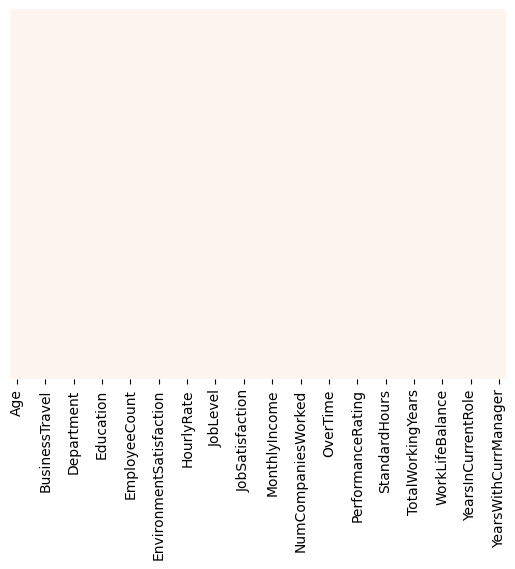

In [20]:
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Reds')

There are no NA values

<font color='#01579B'>Distribution analysis </font>

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

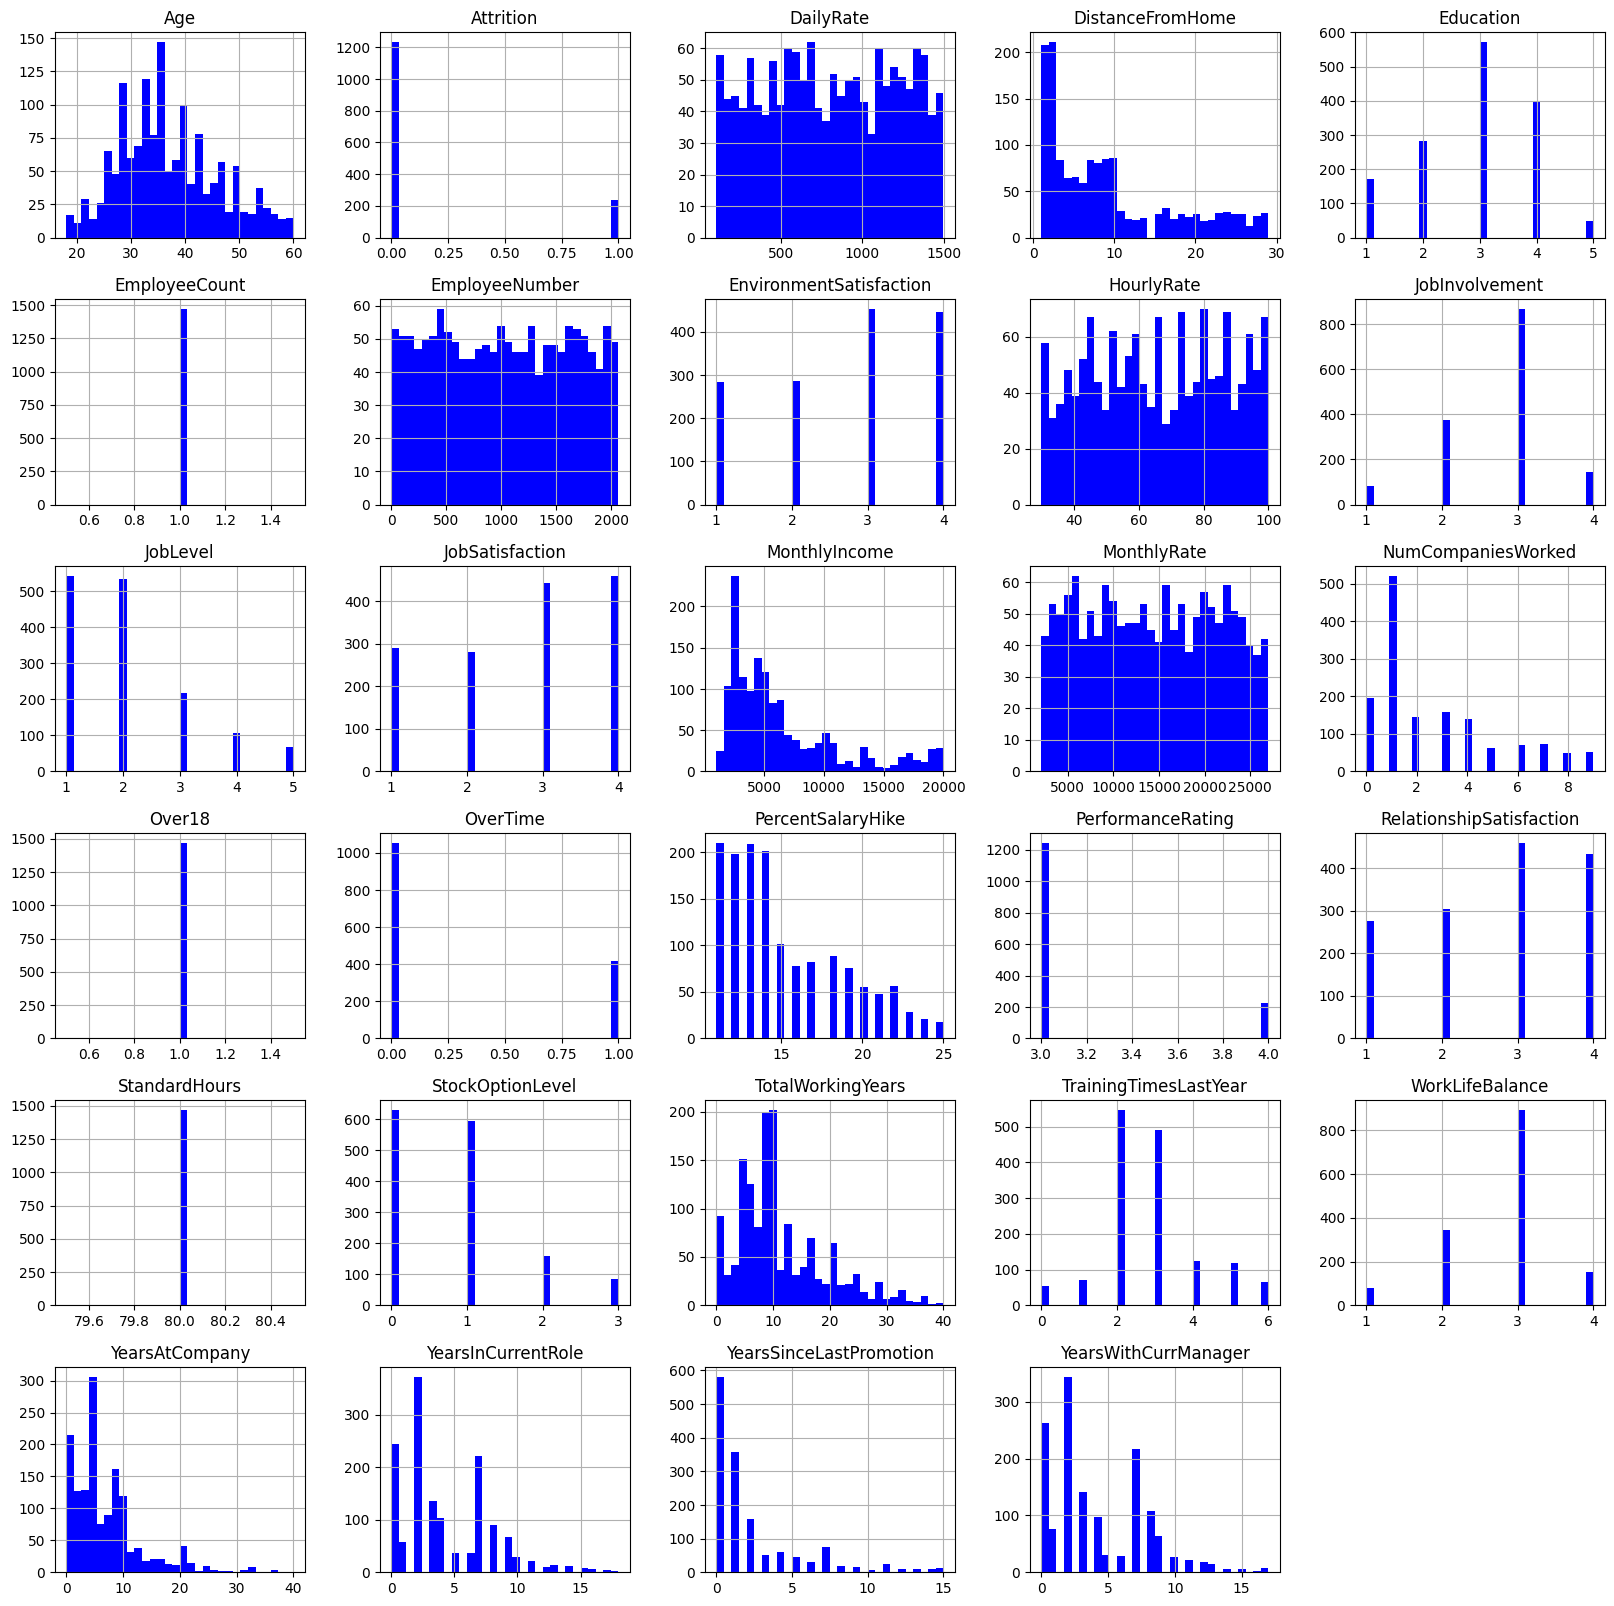

In [21]:
employee_df.hist(bins=30, figsize=(20,20), color= 'b')

<font color = '5DADE2'> With the distribution plots, it's observed that the variables 'EmployeeCount', 'StandardHours', 'Over18', and 'EmployeeNumber' show no variation. Therefore, they are removed from the dataset </font>


In [22]:
employee_df.drop(['EmployeeCount','StandardHours','Over18', 'EmployeeNumber'], axis=1, inplace=True)

### <font color='blue'> Analysis of the Target Variable </font>

1 = Employees who stay in the company

0 = Employees who have left the company

In [23]:
left_df = employee_df[employee_df['Attrition']==1 ]
stay_df = employee_df[employee_df['Attrition'] == 0]

In [24]:
print('Total employees', len(employee_df))
print('Left the company = ', len(left_df))
print('Stay the company = ', len(stay_df))

print('Percentage of emplyees who left the company = ',round(1.*len(left_df) / len(employee_df)*100.0 , 2) , '%')
print('Percentage of employees who stay the company = ', round( 1.*len(stay_df) / len(employee_df)*100.0, 2), '%' )

Total employees 1470
Left the company =  237
Stay the company =  1233
Percentage of emplyees who left the company =  16.12 %
Percentage of employees who stay the company =  83.88 %


<font color = 'magenta'> Descriptive statistics analysis of the employees who left the company </font>

In [25]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


<font color = '#01579B'> Descriptive statistics analysis of the employees who stay in the company </font>

In [26]:
stay_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [27]:
if stay_df.isna().any().any():
    print("El DataFrame tiene valores NaN.")
else:
    print("El DataFrame no tiene valores NaN.")

El DataFrame no tiene valores NaN.


In [28]:
if left_df.isna().any().any():
    print("El DataFrame tiene valores NaN.")
else:
    print("El DataFrame no tiene valores NaN.")

El DataFrame no tiene valores NaN.


### <font color = '#5DADE2'> Descriptive statistics analysis of the employees who left the company </font>

<font color = '#5DADE2'> Heatmap </font>

In [29]:
corr = employee_df.corr(numeric_only=True)

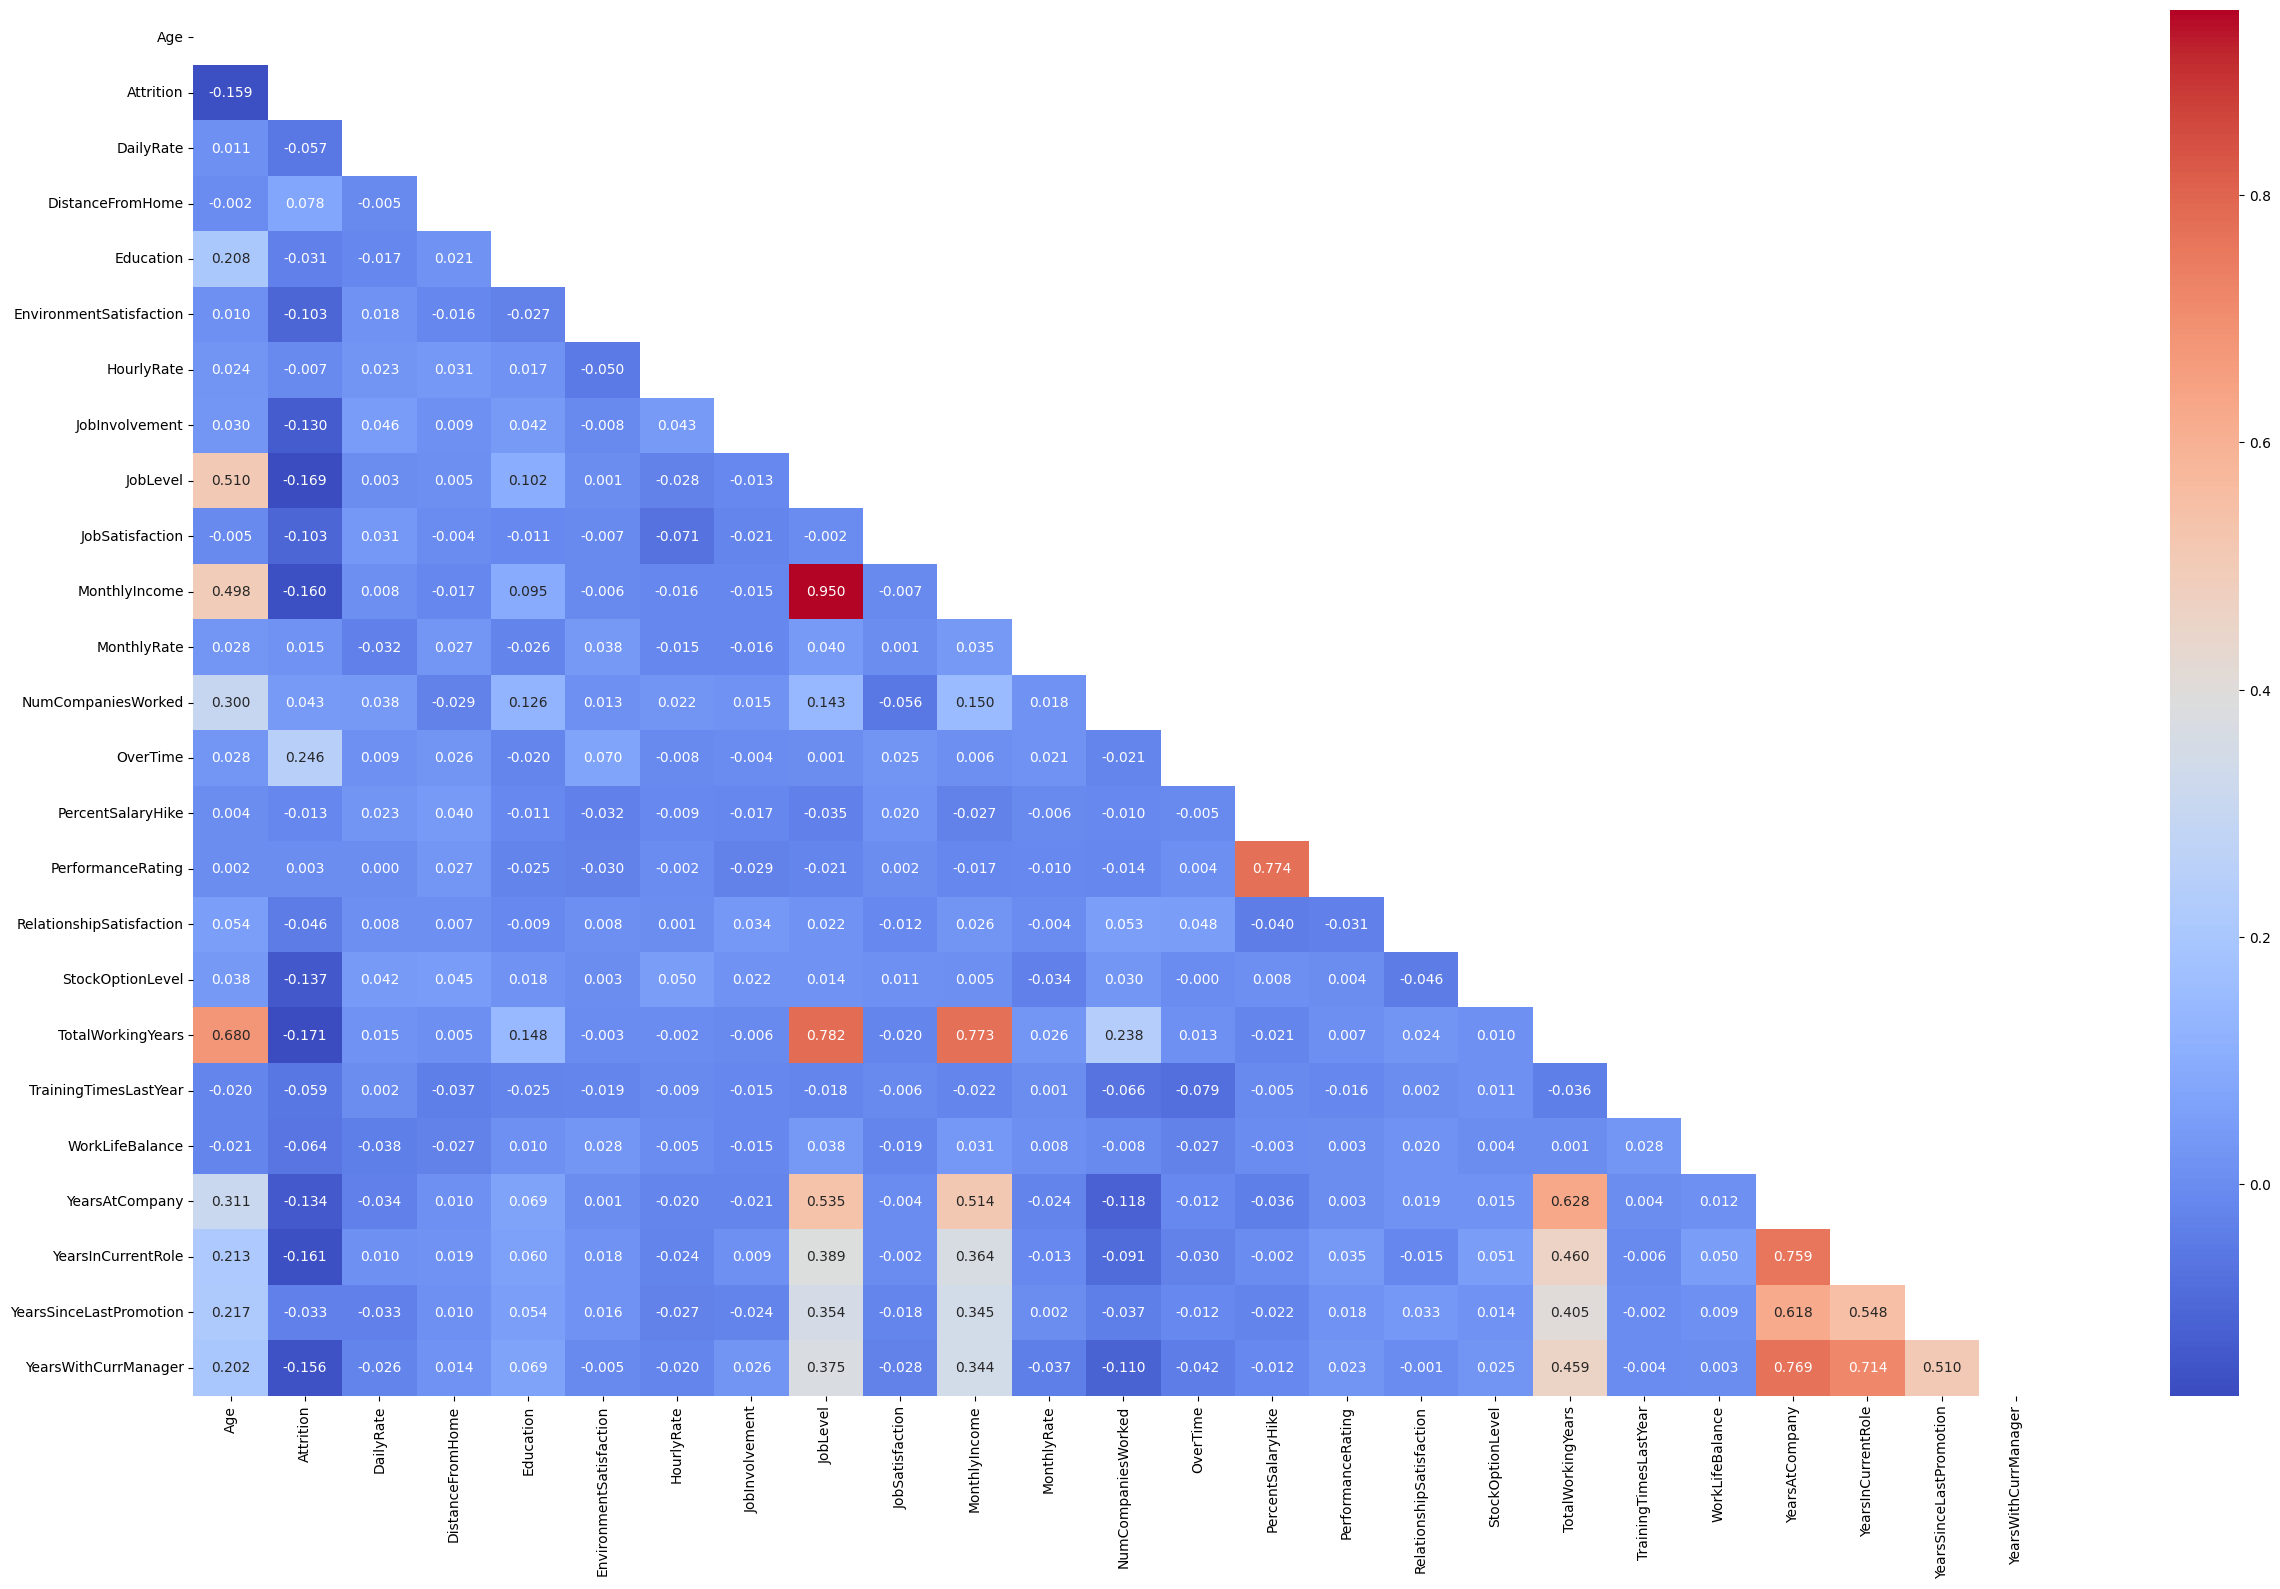

In [30]:
import seaborn as sns

lower = corr.where(np.tril(np.ones(corr.shape), k=-1).astype(bool))  # display the lower triangular matrix
#upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))      # display the upper triangular matrix
plt.figure(figsize=(30,18))
sns.heatmap(lower, annot=True,fmt=".3f", cmap='coolwarm', mask = np.isnan(lower))
plt.show()

<font color='#5DADE2'> Correlation analysis with respect to the target variable  </font>

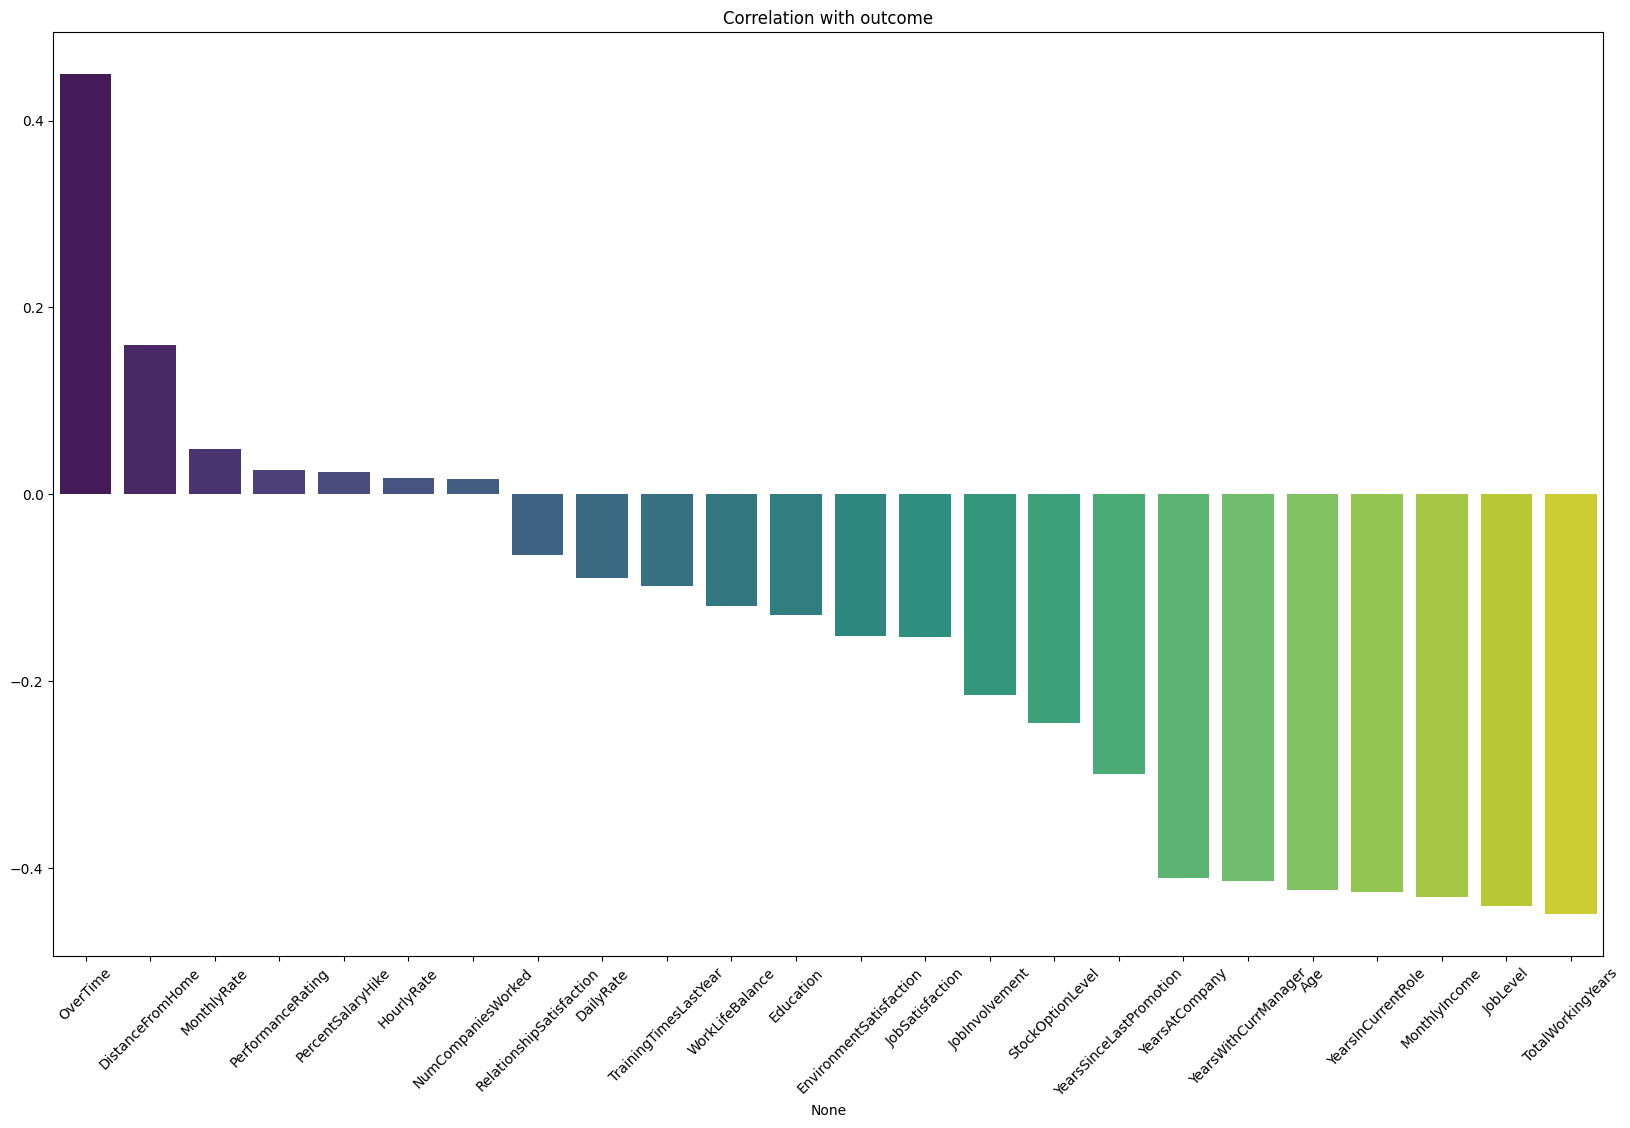

In [31]:
correlation2 = employee_df.corr(numeric_only=True)
features = correlation2.drop(columns='Attrition')
correlation = features.corrwith(correlation2['Attrition']).sort_values(ascending=False)

fig = plt.figure(figsize=(20,12))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.title('Correlation with outcome')
plt.xticks(rotation=45)
plt.show()
#corr['Attrition'].sort_values(ascending=False)

### <font color='magenta'> Comparison of distributions </font>

- A graph is plotted with the variable Age, and the 'Attrition' variable will be used as a comparison variable for each age.

- We want to see how many employees have left or stayed by age

Text(0.5, 1.0, 'employees have left or stayed by age')

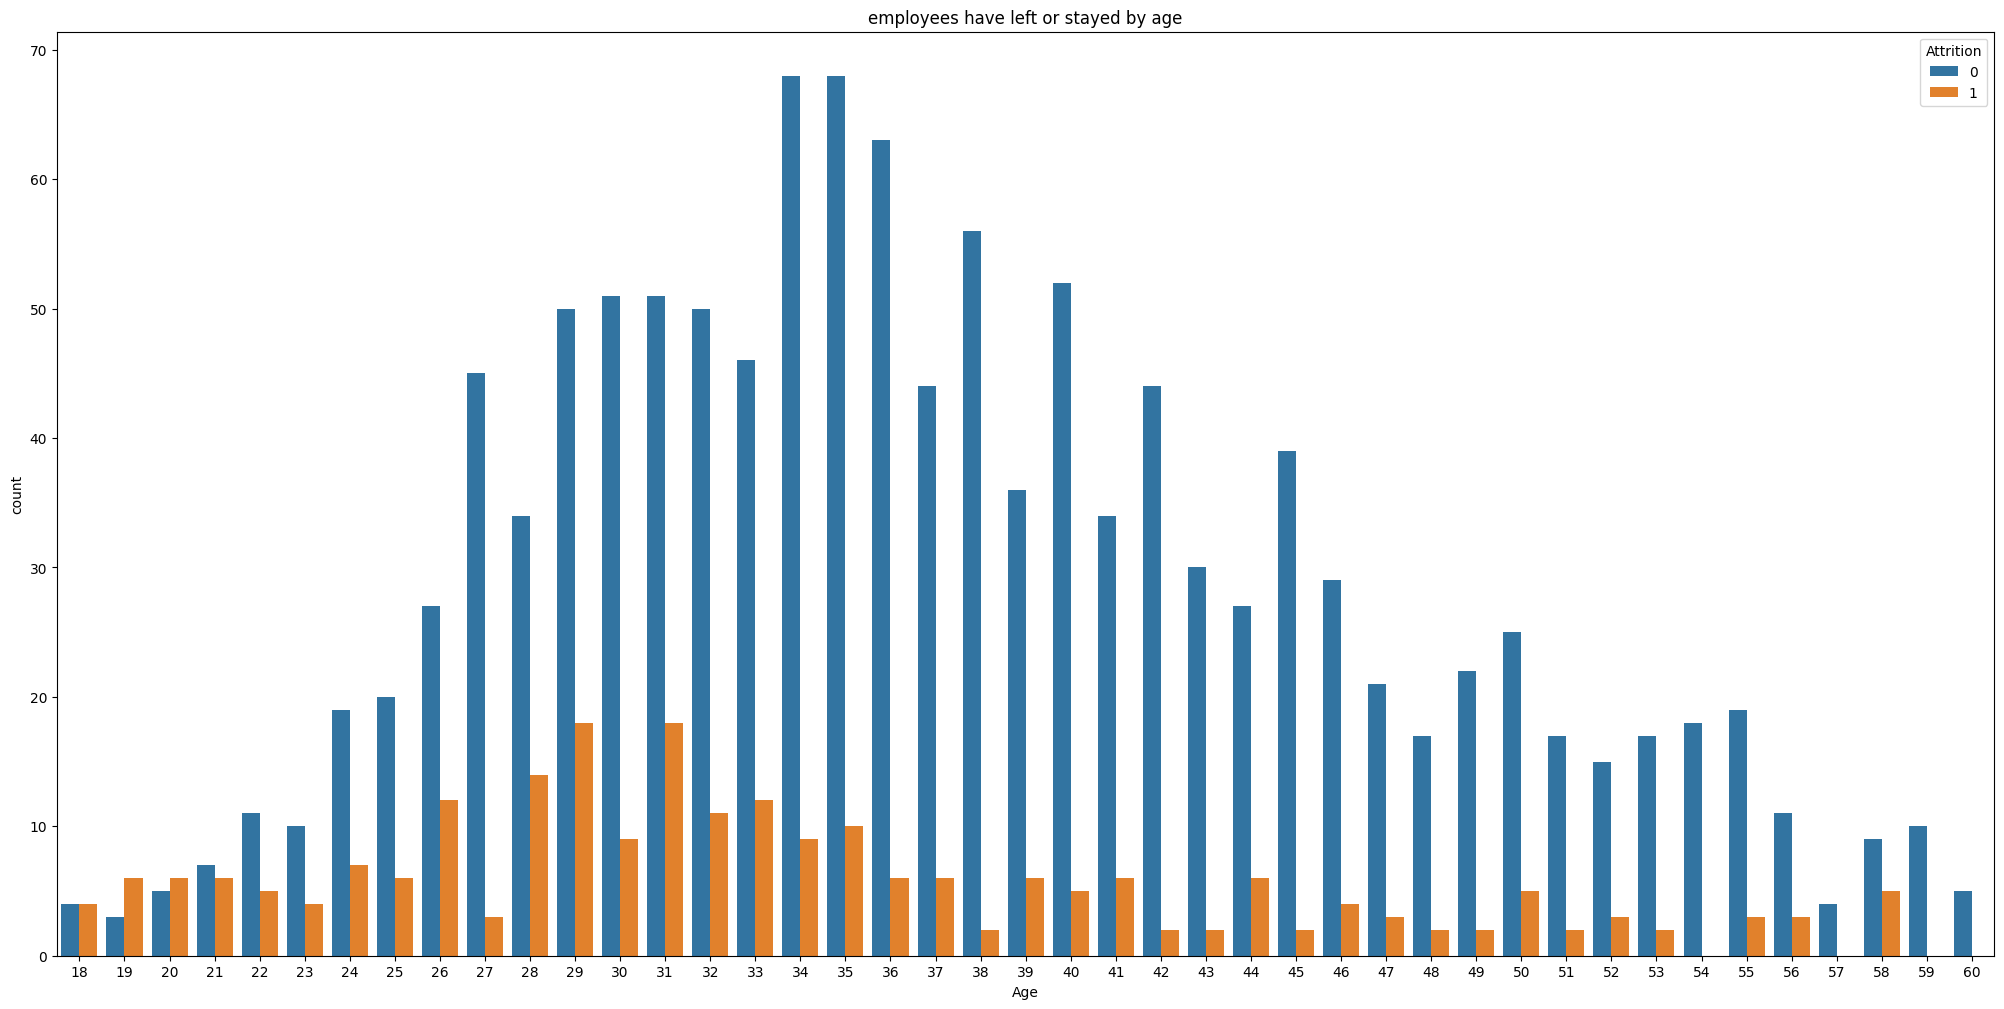

In [32]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue= 'Attrition', data = employee_df)
plt.title('employees have left or stayed by age')

Text(0.5, 1.0, 'Marital status they hold within the company')

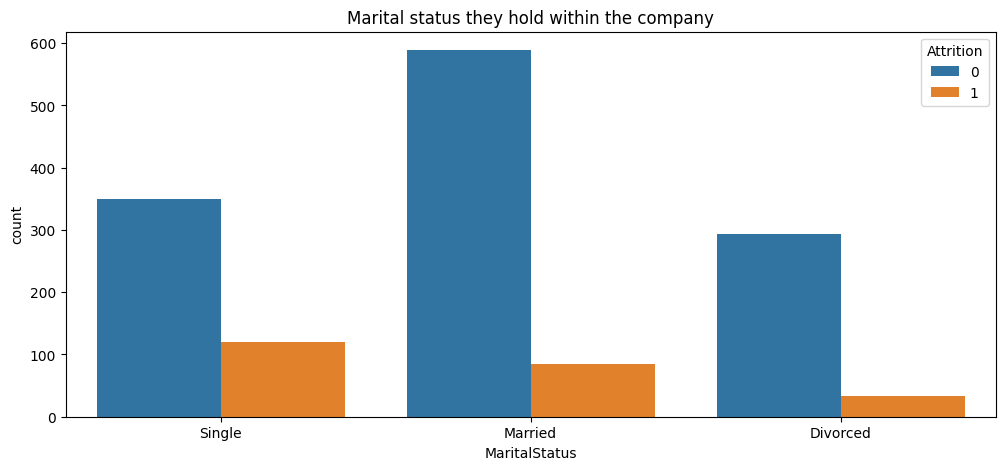

In [33]:
plt.figure(figsize=[12,5])
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.title('Marital status they hold within the company')

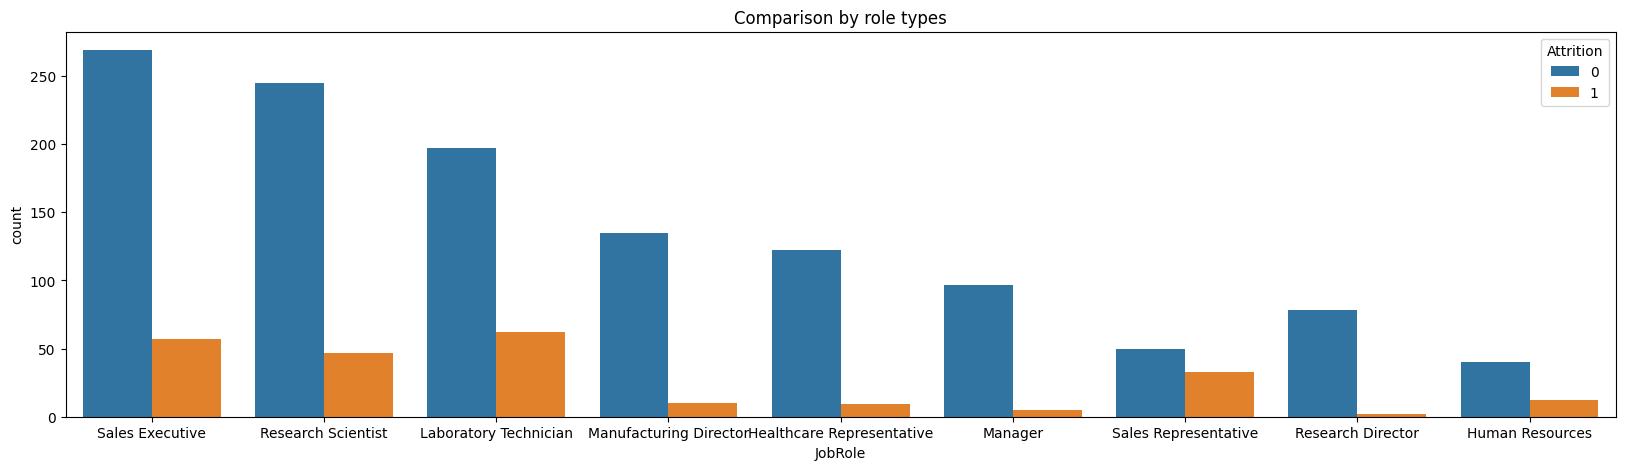

In [34]:

plt.figure(figsize=[20,5])
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.title('Comparison by role types')
plt.show()

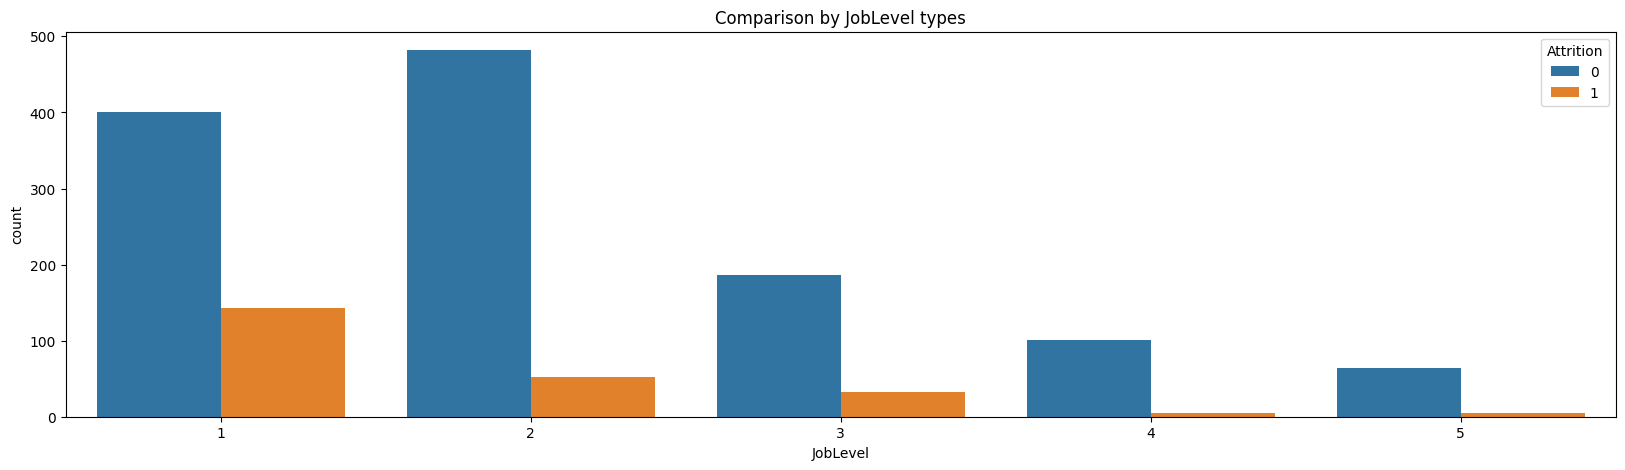

In [35]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)
plt.title('Comparison by JobLevel types')
plt.show()

<font color = 'magenta'> Kernel Density Estimate (KDE) plots </font>

Text(0.5, 0, 'Distance from home to workplace')

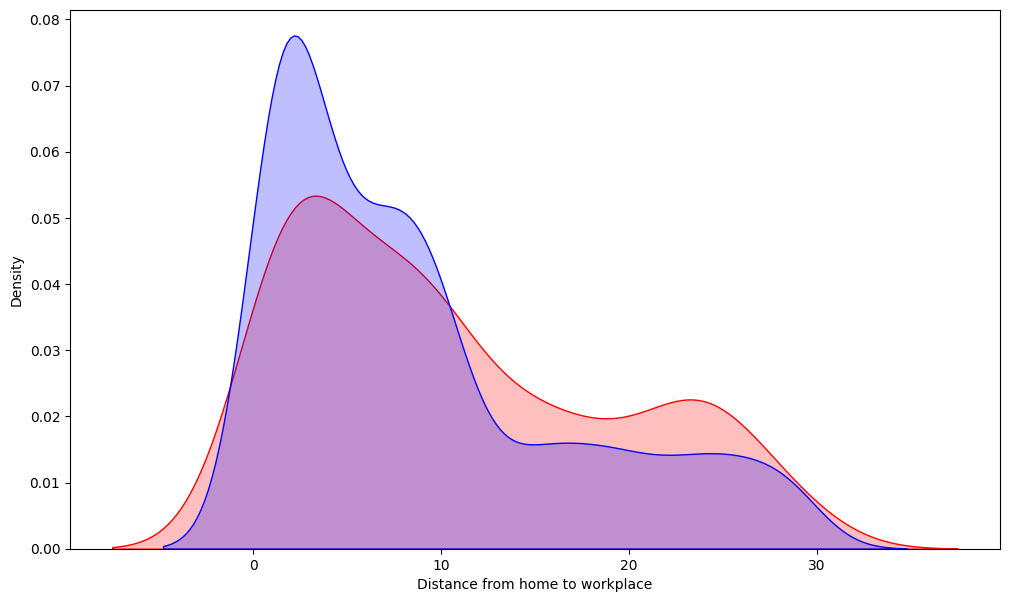

In [36]:
plt.figure(figsize= (12,7))
sns.kdeplot(left_df['DistanceFromHome'], label="Employees who left the company" , fill= True, color = 'r')
sns.kdeplot(stay_df['DistanceFromHome'],  label="Emplyees who stay in the company" , fill = True, color = 'b')
plt.xlabel('Distance from home to workplace')

<font color = 'magenta'> We will plot the Probability Density Estimation with  the variable YearsWithCurrManager, which indicates the number of years with the same manager </font>




Text(0.5, 0, 'Years with current manager')

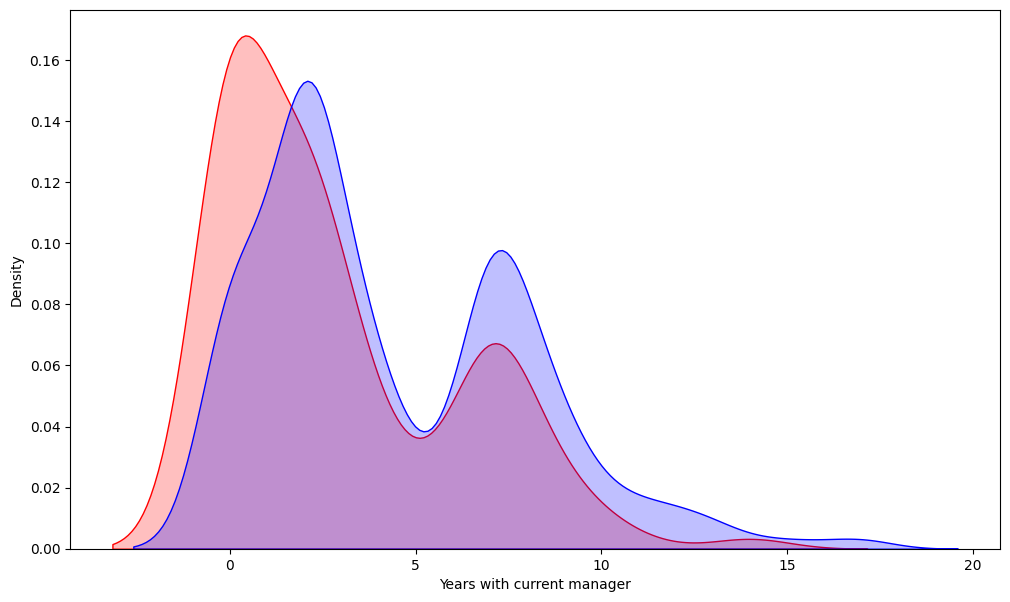

In [37]:
plt.figure(figsize= (12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label="Employees who left the company" , fill= True, color = 'r')
sns.kdeplot(stay_df['YearsWithCurrManager'],  label="Emplyees who stay in the company" , fill = True, color = 'b')
plt.xlabel('Years with current manager')

<font color = 'magenta'> We will plot the Probability Density Estimation with the variable TotalWorkingYears, which indicates the total years of work </font>


Text(0.5, 0, 'Total years of employment')

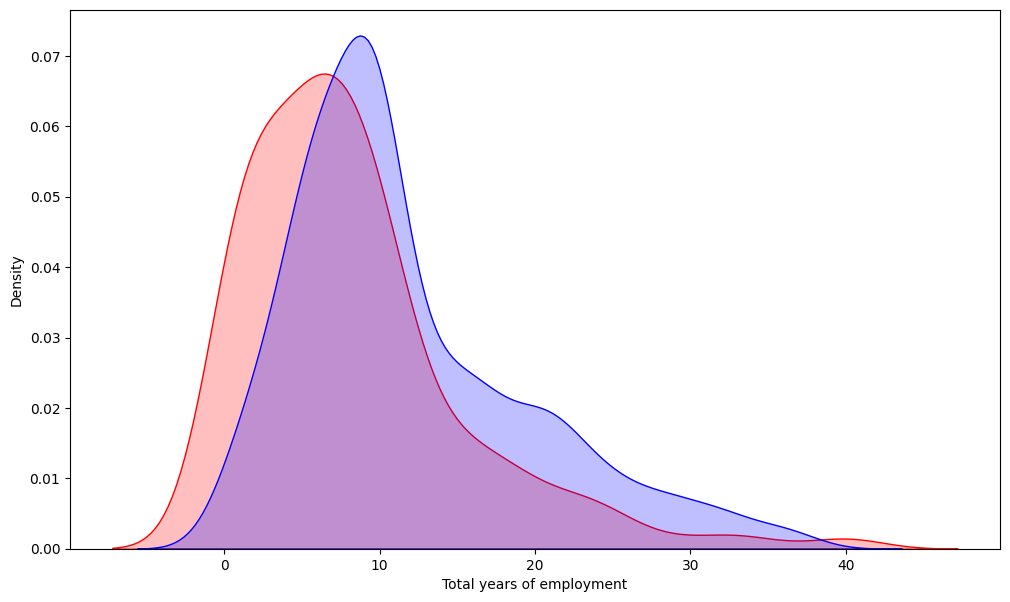

In [38]:
plt.figure(figsize= (12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label="Employees who left the company" , fill= True, color = 'r')
sns.kdeplot(stay_df['TotalWorkingYears'],  label="Emplyees who stay in the company" , fill = True, color = 'b')
plt.xlabel('Total years of employment')

## <font color ='magenta'> Boxplot </font>

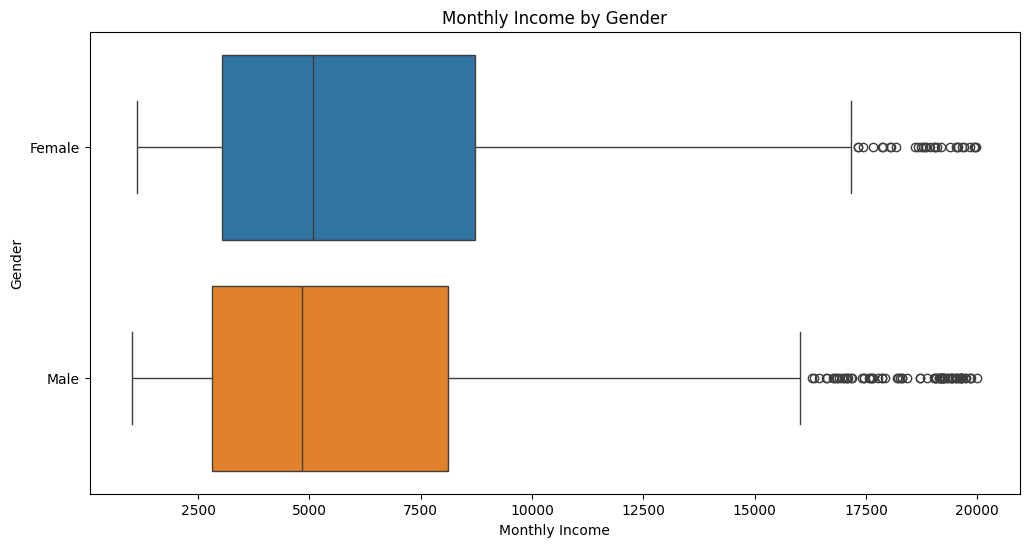

In [39]:
plt.figure(figsize=(12, 6))

# Create the boxplot with different colors for each gender
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df, hue='Gender')

# Add a title and labels
plt.title('Monthly Income by Gender')
plt.xlabel('Monthly Income')
plt.ylabel('Gender')

# Show the plot
plt.show()

Text(0, 0.5, 'JobRole')

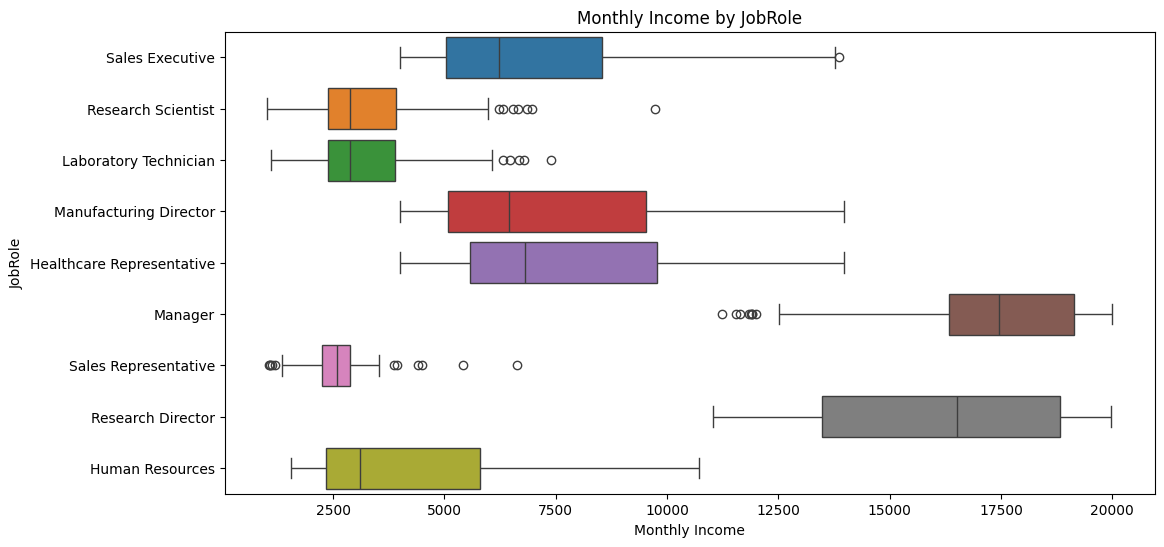

In [40]:
# Create the boxplot with different colors for each JobRole

plt.figure(figsize=(12, 6))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df, hue='JobRole')

# Add a title and labels
plt.title('Monthly Income by JobRole')
plt.xlabel('Monthly Income')
plt.ylabel('JobRole')

## <font color='#5DADE2'> Feature Engineering </font>

<font color = 'magenta'> Conversion of categorical variables to numeric  </font>

In [41]:
dtypes = employee_df.dtypes
dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [42]:
X_cat = employee_df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus' ]]

In [43]:
X_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [44]:
from sklearn.preprocessing import OneHotEncoder
onehotenc = OneHotEncoder()
X_cat = onehotenc.fit_transform(X_cat).toarray()

In [45]:
X_cat.shape

(1470, 26)

In [46]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<font color = 'magenta'> Selection of numerical variables </font>

In [47]:
X_numerical = employee_df._get_numeric_data()
X_numerical = X_numerical.drop(columns = 'Attrition', axis=1)

In [48]:
X_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


<font color = 'magenta'> Final dataframe created by mergin numerical and transformed categorical variables </font>

In [49]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


<font color = 'magenta'> The data is Normalized </font>

variables that are unnecessary for training the model are removed during the correlation analysis

In [50]:
#columns_to_drop = ['JobLevel', 'TotalWorkingYears', 'PercentSalaryHike', 'YearsInCurrentRole']
#X_all.drop(columns=columns_to_drop, inplace=True)

In [51]:
X_all= X_all.rename(str,axis="columns")

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)


In [53]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

### <font color='#5DADE2'> The dataset with the dependent variable is created </font>

In [54]:
y = employee_df['Attrition']

<font color = 'magenta'> Training and Test data </font>

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [56]:
X_train.shape

(1102, 50)

In [57]:
X_test.shape

(368, 50)

## <font color='DarkSalmon'> Models Training and Evaluation  </font>

### <font color = 'blue'> Logistic Regression </font>

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

<font color = 'magenta'> The training data is fitted to the created model </font>

In [92]:
model.fit(X_train, y_train)

LogisticRegression()

<font color = 'magenta'> Predictions are made using the trained model with test dataset </font>

In [93]:
y_pred = model.predict(X_test)

In [94]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

<font color = 'magenta'> Model evaluation </font>

In [95]:
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy {} %".format(100*accuracy_score(y_test, y_pred)))

Accuracy 89.67391304347827 %


<font color = 'magenta'> Confusion Matriz </font>

<Axes: >

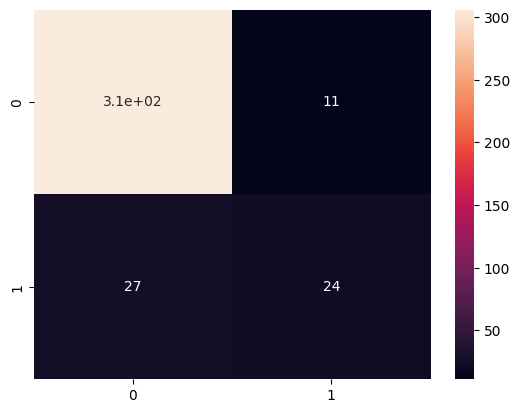

In [96]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

<font color = 'magenta'> The measurement is created using the F1 metric </font>

In [97]:
Logistic_Regression_metrics = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       317
           1       0.69      0.47      0.56        51

    accuracy                           0.90       368
   macro avg       0.80      0.72      0.75       368
weighted avg       0.89      0.90      0.89       368



### <font color = 'Blue'> Random Forest </font>

In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

<font color = 'magenta'> The training data is fitted to the created model </font>

In [99]:
model.fit(X_train, y_train)

RandomForestClassifier()

<font color = 'magenta'> Predictions are made using the training model with test dataset </font>

In [100]:
y_pred = model.predict(X_test)

<font color = 'magenta'> Confusion Matrix </font>

<Axes: >

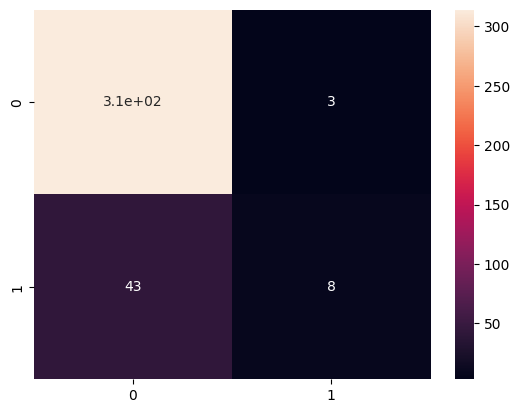

In [101]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

<font color = 'magenta'> The measurement is created using the F1 metric </font>

In [102]:
random_forest_metrics = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       317
           1       0.73      0.16      0.26        51

    accuracy                           0.88       368
   macro avg       0.80      0.57      0.59       368
weighted avg       0.86      0.88      0.84       368



### <font color = 'blue'> Neural Networks </font>

In [ ]:
#pip install tensorflow-gpu

In [71]:
import tensorflow as tf

<font color = 'magenta'> The model is created </font>

In [103]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))


In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               25500     
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527001 (2.01 MB)
Trainable params: 527001 (2.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model is compiled, specifying the optimizer to be used, typically some variant of gradient descent such as the Adam optimizer, and the loss function that will be used to measure the error

In [105]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [106]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 0.4657 - accuracy: 0.8212
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3597 - accuracy: 0.8539
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3272 - accuracy: 0.8730
Epoch 4/100
23/23 [==============================] - 0s 11ms/step - loss: 0.2914 - accuracy: 0.8893
Epoch 5/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2584 - accuracy: 0.9011
Epoch 6/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2601 - accuracy: 0.8975
Epoch 7/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2110 - accuracy: 0.9165
Epoch 8/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1676 - accuracy: 0.9356
Epoch 9/100
23/23 [==============================] - 0s 11ms/step - loss: 0.1536 - accuracy: 0.9474
Epoch 10/100
23/23 [==============================] - 0s 11ms/step - loss: 0.1191 - accuracy: 0.9564

<font color = 'magenta'> Predictions are made using the trained model with test dataset </font>

In [108]:
y_pred = model.predict(X_test)
y_pred[:10]

12/12 [==============================] - 0s 8ms/step


array([[4.0884288e-12],
       [3.9675656e-19],
       [5.8553509e-13],
       [3.6617988e-07],
       [8.7516645e-28],
       [5.0620397e-06],
       [1.3957686e-10],
       [9.1181750e-23],
       [3.2725047e-09],
       [9.7413406e-02]], dtype=float32)

<font color = 'magenta'> A precision threshold is created in the y_test variable to compare with the actual values </font>

In [109]:
y_pred = (y_pred > 0.5)

<font color = 'magenta'> The loss and accuracy of the model are plotted against the neural network's history as it completes the 100 iterations </font>


In [110]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

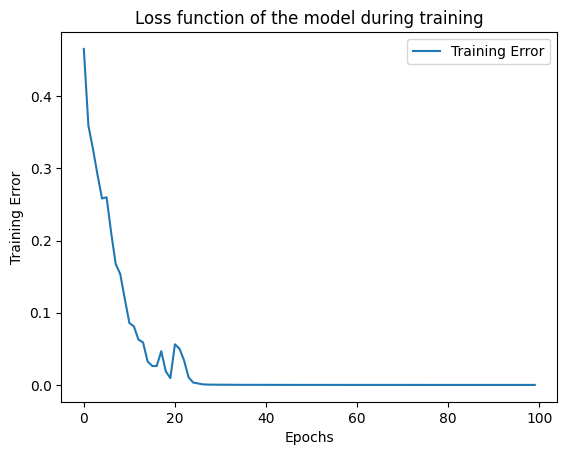

In [111]:
plt.plot(epochs_hist.history['loss'])
plt.title("Loss function of the model during training")
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.legend(["Training Error"])

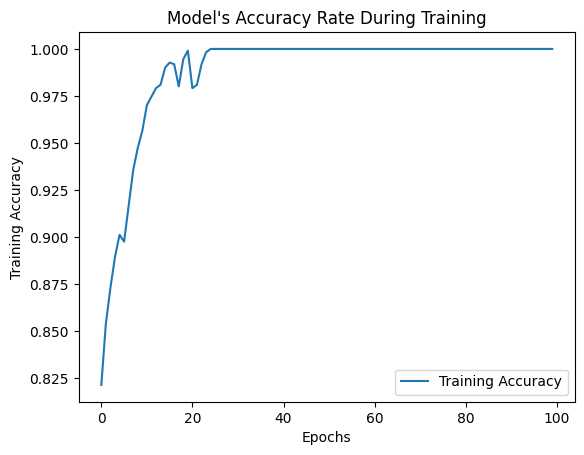

In [112]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Model's Accuracy Rate During Training")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.legend(["Training Accuracy"])

<font color = 'magenta'> Confusion Matriz </font>

<Axes: >

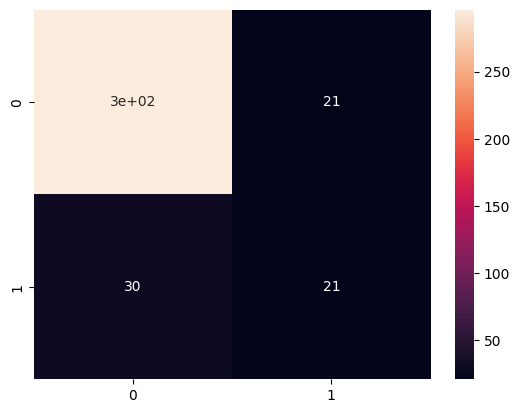

In [113]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True)

<font color = 'magenta'> The measurement is created using the F1 metric </font>

In [114]:
neural_networks_metrics = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       317
           1       0.50      0.41      0.45        51

    accuracy                           0.86       368
   macro avg       0.70      0.67      0.69       368
weighted avg       0.85      0.86      0.86       368



<font color = 'DarkSalmon'> Metrics from the three trained models to facilitate comparison and select the best model </font>

In [115]:
print(f'The metrics for logistic regression are:\n {Logistic_Regression_metrics}')
print('============================================================')
print(f'The metrics for random forest are:\n {random_forest_metrics}')
print('============================================================')
print(f'The metrics for random forest are:\n {neural_networks_metrics}')

The metrics for logistic regression are:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       317
           1       0.69      0.47      0.56        51

    accuracy                           0.90       368
   macro avg       0.80      0.72      0.75       368
weighted avg       0.89      0.90      0.89       368

The metrics for random forest are:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       317
           1       0.73      0.16      0.26        51

    accuracy                           0.88       368
   macro avg       0.80      0.57      0.59       368
weighted avg       0.86      0.88      0.84       368

The metrics for random forest are:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       317
           1       0.50      0.41      0.45        51

    accuracy                           0.86       368
   macro avg  